In [1]:
from JPEG import *
from scipy.ndimage.filters import gaussian_filter 
from scipy.misc import *


(64, 64, 3)


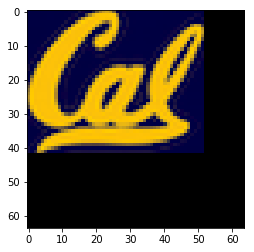

In [2]:
video = skvideo.io.vread("Rolling.png")

frame = video[0,:,:,:]
#LOW PASS FILTER
frame = gaussian_filter(frame,.08)

frame =  map2multiple(frame,64)   



# ycc_frame = rgb2YCbCr(frame)
ycc_frame = frame 
plt.imshow(ycc_frame[:,:,:].astype(np.uint8))
print(ycc_frame.shape)

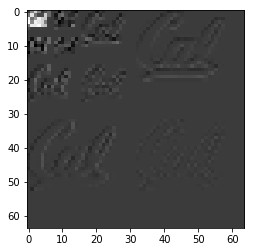

In [3]:
Y = ycc_frame[:,:,0]
dwt = dwt2(Y,level=3,wavelet="haar")
plt.imshow(dwt,cmap="gray")

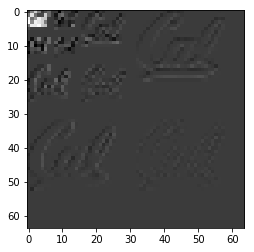

In [4]:

dwt = thresh_dwt(dwt, f=.5)
dwt = quantize(dwt, 2**3)
plt.imshow(dwt,cmap="gray")

In [5]:


i_dwt = dequantize(dwt, 2**3)
compressed_img = idwt2(i_dwt, levels=3,wavelet="haar") 

compressed_img.shape

(64, 64)

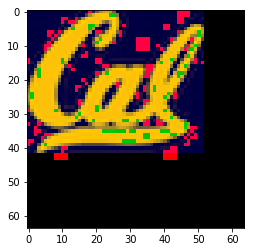

In [6]:



ycc_frame[:,:,0] = compressed_img
plt.imshow(ycc_frame.astype(np.uint8))

3
2
2


C:\Users\bobos\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  # This is added back by InteractiveShellApp.init_path()


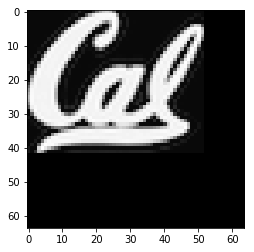

In [31]:
video = skvideo.io.vread("Rolling.png")

test_frame = frame = video[0,:,:,:]

#LOW PASS FILTER
frame = gaussian_filter(frame,.1)

# Rescale to nearest mutiple of 64
frame =  map2multiple(frame,64)  
ycc_frame = rgb2YCbCr(frame)
ycc_breakdown = [ycc_frame[:,:,0],imresize(ycc_frame[:,:,1],.5),imresize(ycc_frame[:,:,2],.5)]

wavelet = 'db4'

ycc_compressed = []
levels = []
for channel in ycc_breakdown :
    level = wavelet_level(channel,wavelet)
    stepsize = 2**level
    
    print(level)
    
    dwt = dwt2(channel,level=level,wavelet=wavelet)
    thresholded_dwt= thresh_dwt(dwt, f=.01)
    quatized_dwt = quantize(dwt, stepsize)
    levels.append(level)
    ycc_compressed.append(quatized_dwt)
    
plt.imshow(ycc_breakdown[0],cmap = "gray")


C:\Users\bobos\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
C:\Users\bobos\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.


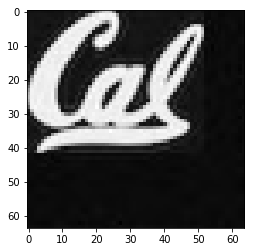

In [35]:
ycc_recovered = []

for i,channel in enumerate(ycc_compressed):
    
    
    
    level = levels[i]
    dequantized_dqt =dequantize(channel, 2**level,delta=0.5)

    compressed_channel = idwt2(dequantized_dqt, levels=level,wavelet = wavelet)
    
    
    ycc_recovered.append(compressed_channel)


    
rec_ycc = np.zeros(ycc_frame.shape)
rec_ycc[:,:,0] = ycc_recovered[0]
rec_ycc[:,:,1] = imresize(ycc_recovered[1],2.0)
rec_ycc[:,:,2] = imresize(ycc_recovered[2],2.0)
plt.imshow(rec_ycc[:,:,0],cmap='gray')

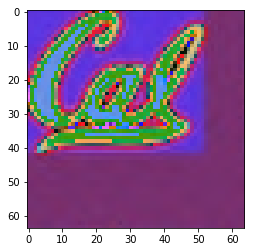

In [33]:
rec_rgb = YCbCr2rgb(rec_ycc).astype(np.uint8)
plt.imshow(rec_rgb)


In [28]:
from JPEG import *
from scipy.ndimage.filters import gaussian_filter 
from scipy.misc import *




video = skvideo.io.vread("Rolling.png")

compressed_video = []
meta_levels = []

og_shape = 0

for i in range(video.shape[0]):
    lpf_frame = gaussian_filter(video[i,:,:,:],.08)
    padded_frame = map2multiple(lpf_frame,64) 
    og_shape = padded_frame.shape
    c_frame,meta = compress_block(padded_frame,threshhold = .01)
    compressed_video.append(c_frame)
    meta_levels.append(meta)






In [26]:
rec_video = []

for i,frame in enumerate(compressed_video):
    
    rec_video.append(decompress_block(frame,meta_levels[i],og_shape))
    

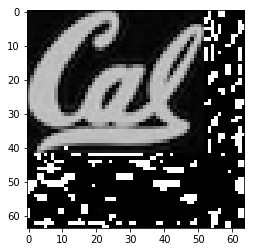

In [27]:
plt.imshow(rec_video[0][:,:,0].astype(np.uint8),cmap="gray")

In [4]:
print(meta_levels)

[[7, 6, 6]]
